# Titanic: Machine Learning from Disaster
* 1. Defining the problem statement
* 2. Collecting the data
* 3. Exploratory data analysis
* 4. Feature engineering
* 5. Modelling
* 6. Testing

# 1. Defining the problem statement
what sorts of people were more likely to survive?

In [ ]:
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/5095eabce4b06cb305058603/5095eabce4b02d37bef4c24c/1352002236895/100_anniversary_titanic_sinking_by_esai8mellows-d4xbme8.jpg")

# 2. Collecting the data
download from https://www.kaggle.com/c/titanic/data
### load train, test dataset using Pandas

In [28]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

train = pd.read_csv("E:/kaggle/titanic/train.csv")
test = pd.read_csv("E:/kaggle/titanic/test.csv")
submit = pd.read_csv('E:/kaggle/titanic/gender_submission.csv')

In [29]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('E:/kaggle'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

E:/kaggle\titanic\gender_submission.csv
E:/kaggle\titanic\test.csv
E:/kaggle\titanic\titanic.zip
E:/kaggle\titanic\titanic_stella.ipynb
E:/kaggle\titanic\train.csv
E:/kaggle\titanic\Untitled


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# 3. Exploratory data analysis
## 3.1 Exploring data without Categorical Features
* info
* shape
* head
* isnull().sum()
* describe

## data dictionary
* Survived: 0 = No, 1 = Yes
* pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
* sibsp: # of siblings and spouses 夫妻 aboard the Titanic
* parch: # of parents and children aboard the Titanic
* ticket: Ticket number
* cabin: Cabin number 艙
* embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton 港口

In [ ]:
train.info()  # data stucture

In [ ]:
test.info()

In [ ]:
train.shape   # data size

In [ ]:
test.shape 

In [ ]:
train.head()  # first 5 datas

In [ ]:
test.head()  # first 5 datas

In [31]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [32]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
train.describe()

In [ ]:
test.describe()

## 3.2 Exploring data with Categorical Features
#### barchart
* pclass
* sex
* embarked 

#### histogram
* age
* fare
* family size = sibsp + parch

### import python lib for visualization

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### combine train and test as data

In [33]:
data = train.append(test)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [34]:
data.reset_index(inplace=True, drop=True)

In [35]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### bar chart

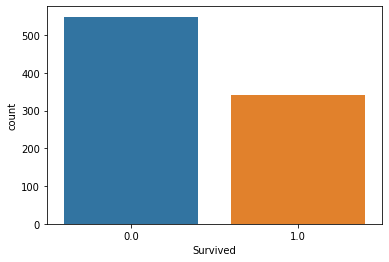

In [36]:
sns.countplot(data['Survived'])

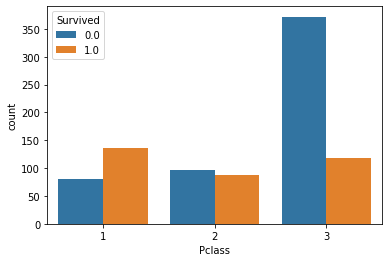

In [37]:
sns.countplot(data['Pclass'],hue = data['Survived'])

The Chart confirms 1st class more likely survivied than other classes  
The Chart confirms 3rd class more likely dead than other classes

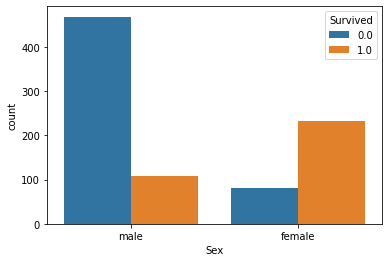

In [38]:
sns.countplot(data['Sex'],hue = data['Survived'])

The Chart confirms Women more likely survivied than Men

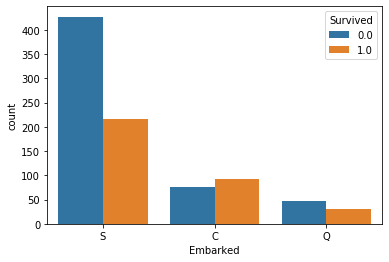

In [39]:
sns.countplot(data['Embarked'],hue = data['Survived'])

The Chart confirms a person aboarded from C slightly more likely survived  
The Chart confirms a person aboarded from Q more likely dead  
The Chart confirms a person aboarded from S more likely dead

### histogram

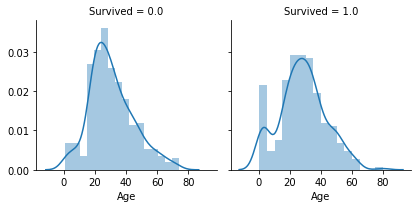

In [40]:
g = sns.FacetGrid(data, col = 'Survived')
g.map(sns.distplot, 'Age')

The Chart confirms a younger person more likely survived

In [ ]:
#dataS = data[data['Survived'] == 1]
#dataD = data[data['Survived'] == 0]
#plt.hist(dataS['Age'], bins = 16)

In [ ]:
#plt.hist(dataD['Age'], bins = 16)

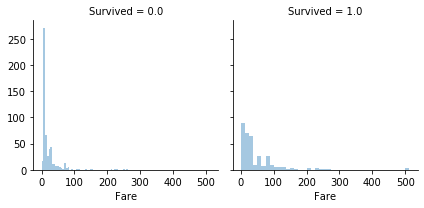

In [41]:
g = sns.FacetGrid(data, col = 'Survived')
g.map(sns.distplot, 'Fare', kde = False)

The Chart confirms a person whose ticket fare is cheaper more likely dead

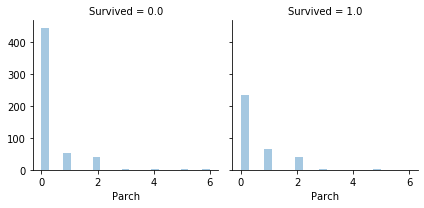

In [42]:
g = sns.FacetGrid(data, col = 'Survived')
g.map(sns.distplot, 'Parch', kde = False)

The Chart confirms a person aboarded with more than 2 parents or children more likely survived  
The Chart confirms a person aboarded alone more likely dead

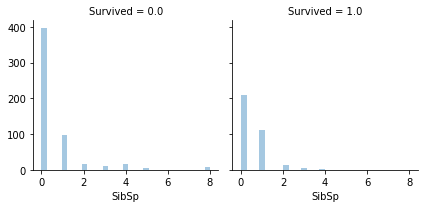

In [43]:
g = sns.FacetGrid(data, col = 'Survived')
g.map(sns.distplot, 'SibSp', kde = False)

The Chart confirms a person aboarded with more than 2 siblings or spouse more likely survived  
The Chart confirms a person aboarded without siblings or spouse more likely dead

In [44]:
data['Family_Size'] = data['Parch'] + data['SibSp']

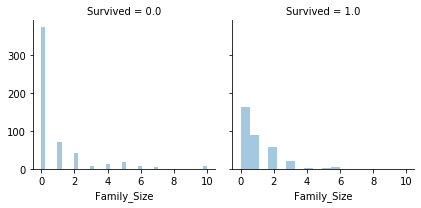

In [45]:
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'Family_Size', kde=False)

# 4. Feature engineering
* 1. extract title from name
* 2. extract ticket info from ticket
* 3. fill NA : Embarked
* 4. fill NA : Fare
* 5. extract cabin info from cabin
* 6. fill NA : Age

## 4.1 extract title from name

In [46]:
data['Name'].str.split(", ", expand=True)

,0,1
0,Braund,Mr. Owen Harris
1,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss. Laina
3,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,Allen,Mr. William Henry
...,...,...
1304,Spector,Mr. Woolf
1305,Oliva y Ocana,Dona. Fermina
1306,Saether,Mr. Simon Sivertsen
1307,Ware,Mr. Frederick


In [47]:
data['Title1'] = data['Name'].str.split(", ", expand=True)[1]

In [48]:
data['Title1'] = data['Title1'].str.split(".", expand=True)[0]

In [49]:
data['Title1'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [50]:
pd.crosstab(data['Title1'],data['Sex']).T.style.background_gradient(cmap='summer_r')

Title1,Capt,Col,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Sex,,,,,,,,,,,,,,,,,,
female,0,0,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0,1
male,1,4,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1,0


In [51]:
data.groupby(['Title1'])['Age'].mean()

Title1
Capt            70.000000
Col             54.000000
Don             40.000000
Dona            39.000000
Dr              43.571429
Jonkheer        38.000000
Lady            48.000000
Major           48.500000
Master           5.482642
Miss            21.774238
Mlle            24.000000
Mme             24.000000
Mr              32.252151
Mrs             36.994118
Ms              28.000000
Rev             41.250000
Sir             49.000000
the Countess    33.000000
Name: Age, dtype: float64

In [52]:
data['Title2'] = data['Title1'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','the Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
                                        ['Miss','Mrs','Miss','Mr','Mr','Mrs','Mrs','Mr','Mr','Mr','Mr','Mr','Mr','Mrs'])

In [53]:
data['Title2'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master'], dtype=object)

In [54]:
data.groupby(['Title2'])['Age'].mean()

Title2
Master     5.482642
Miss      21.824366
Mr        32.811056
Mrs       36.971264
Name: Age, dtype: float64

In [55]:
pd.crosstab(data['Title2'],data['Sex']).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

Title2,Master,Miss,Mr,Mrs
Sex,,,,
female,0,264,1,201
male,61,0,782,0


In [56]:
B = data[data['Title2'] == 'Mr']
A = B[B['Sex'] == 'female']
A

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Title1,Title2
796,797,1.0,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S,0,Dr,Mr


In [57]:
data.loc[796, 'Title2'] = 'Mrs'

In [58]:
pd.crosstab(data['Title2'],data['Sex']).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

Title2,Master,Miss,Mr,Mrs
Sex,,,,
female,0,264,0,202
male,61,0,782,0


In [59]:
pd.crosstab(data['Title2'],data['Survived']).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

Title2,Master,Miss,Mr,Mrs
Survived,,,,
0.0,17,55,451,26
1.0,23,130,86,103


## 4.2 extract ticket info from ticket

In [60]:
data['Ticket_info'] = data['Ticket'].apply(lambda x : x.replace(".","").replace("/","").strip().split(' ')[0] if not x.isdigit() else 'X')

In [62]:
data['Ticket_info'].unique()

array(['A5', 'PC', 'STONO2', 'X', 'PP', 'CA', 'SCParis', 'SCA4', 'A4',
       'SP', 'SOC', 'WC', 'SOTONOQ', 'WEP', 'STONO', 'C', 'SCPARIS',
       'SOP', 'Fa', 'LINE', 'FCC', 'SWPP', 'SCOW', 'PPP', 'SC', 'SCAH',
       'AS', 'SOPP', 'FC', 'SOTONO2', 'CASOTON', 'SCA3', 'STONOQ', 'AQ4',
       'A', 'LP', 'AQ3'], dtype=object)

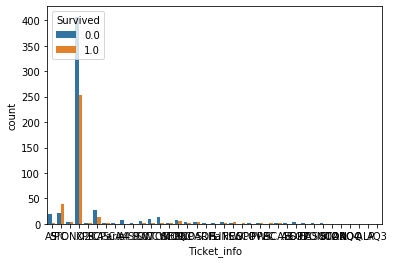

In [63]:
sns.countplot(data['Ticket_info'], hue=data['Survived'])

## 4.3 fill NA : Embarked 

In [64]:
data[data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Title1,Title2,Ticket_info
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0,Miss,Miss,X
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0,Mrs,Mrs,X


In [65]:
data['Embarked'] = data['Embarked'].fillna('S') # 補值

## 4.4 fill NA : Fare

In [66]:
data[data['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Title1,Title2,Ticket_info
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,0,Mr,Mr,X


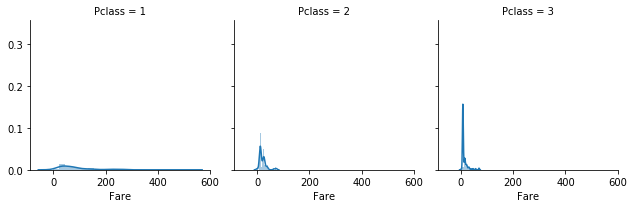

In [67]:
g = sns.FacetGrid(data, col = 'Pclass')
g.map(sns.distplot, 'Fare')

In [68]:
data[data['Pclass'] == 3]['Fare'].median()

8.05

In [69]:
data['Fare'] = data['Fare'].fillna(data[data['Pclass'] == 3]['Fare'].median()) # 補值

## 4.5 extract cabin info from cabin

In [70]:
data['Cabin'].head(10)

0     NaN
1     C85
2     NaN
3    C123
4     NaN
5     NaN
6     E46
7     NaN
8     NaN
9     NaN
Name: Cabin, dtype: object

In [71]:
data["Cabin"] = data['Cabin'].apply(lambda x : str(x)[0] if not pd.isnull(x) else 'NoCabin')

In [72]:
data["Cabin"].unique()

array(['NoCabin', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

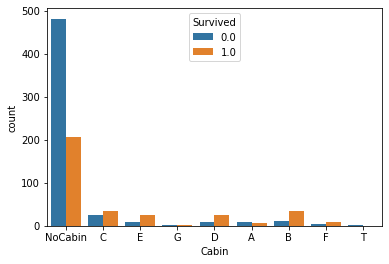

In [73]:
sns.countplot(data['Cabin'], hue=data['Survived'])

## 4.6 fill NA : Age

In [74]:
data["Age"].fillna(data.groupby("Title2")["Age"].transform("median"), inplace=True)

# 5. Modeling

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
 12  Family_Size  1309 non-null   int64  
 13  Title1       1309 non-null   object 
 14  Title2       1309 non-null   object 
 15  Ticket_info  1309 non-null   object 
dtypes: float64(3), int64(5), object(8)
memory usage: 163.8+ KB


In [76]:
data['Sex'] = data['Sex'].astype('category').cat.codes
data['Embarked'] = data['Embarked'].astype('category').cat.codes
data['Pclass'] = data['Pclass'].astype('category').cat.codes
data['Title1'] = data['Title1'].astype('category').cat.codes
data['Title2'] = data['Title2'].astype('category').cat.codes
data['Cabin'] = data['Cabin'].astype('category').cat.codes
data['Ticket_info'] = data['Ticket_info'].astype('category').cat.codes

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int8   
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   int8   
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   int8   
 11  Embarked     1309 non-null   int8   
 12  Family_Size  1309 non-null   int64  
 13  Title1       1309 non-null   int8   
 14  Title2       1309 non-null   int8   
 15  Ticket_info  1309 non-null   int8   
dtypes: float64(3), int64(4), int8(7), object(2)
memory usage: 101.1+ KB


In [78]:
dataTrain = data[pd.notnull(data['Survived'])].sort_values(by=["PassengerId"])
dataTest = data[~pd.notnull(data['Survived'])].sort_values(by=["PassengerId"])

In [79]:
dataTrain.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family_Size', 'Title1',
       'Title2', 'Ticket_info'],
      dtype='object')

In [80]:
#dataTrain.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Titlie1'], axis=1, inplace=True)
#dataTest.drop(['PassengerId', 'Survived', 'Name', 'SibSp', 'Parch', 'Ticket', 'Titlie1'], axis=1, inplace=True)

dataTrain = dataTrain[['Survived', 'Pclass', 'Age', 'Sex', 'Embarked', 'Fare', 'Family_Size', 'Title2','Ticket_info','Cabin']]
dataTest = dataTest[['Age', 'Embarked', 'Fare', 'Pclass', 'Sex', 'Family_Size', 'Title2','Ticket_info','Cabin']]

In [19]:
# 0.4 accuracy
#dataTrain = dataTrain[['Survived', 'Pclass', 'Age', 'Sex', 'Family_Size', 'Cabin']]
#dataTest = dataTest[['Age',  'Pclass', 'Sex', 'Family_Size', 'Cabin']]

In [81]:
dataTrain

,Survived,Pclass,Age,Sex,Embarked,Fare,Family_Size,Title2,Ticket_info,Cabin
0,0.0,2,22.0,1,2,7.2500,1,2,2,7
1,1.0,0,38.0,0,0,71.2833,1,3,14,2
2,1.0,2,26.0,0,2,7.9250,0,1,31,7
3,1.0,0,35.0,0,2,53.1000,1,3,36,2
4,0.0,2,35.0,1,2,8.0500,0,2,36,7
...,...,...,...,...,...,...,...,...,...,...
886,0.0,1,27.0,1,2,13.0000,0,2,36,7
887,1.0,0,19.0,0,2,30.0000,0,1,36,1
888,0.0,2,22.0,0,2,23.4500,3,1,34,7
889,1.0,0,26.0,1,0,30.0000,0,2,36,2


In [82]:
dataTest

,Age,Embarked,Fare,Pclass,Sex,Family_Size,Title2,Ticket_info,Cabin
891,34.5,1,7.8292,2,1,0,2,36,7
892,47.0,2,7.0000,2,0,1,3,36,7
893,62.0,1,9.6875,1,1,0,2,36,7
894,27.0,2,8.6625,2,1,0,2,36,7
895,22.0,2,12.2875,2,0,2,3,36,7
...,...,...,...,...,...,...,...,...,...
1304,30.0,2,8.0500,2,1,0,2,2,7
1305,39.0,0,108.9000,0,0,0,3,14,2
1306,38.5,2,7.2500,2,1,0,2,28,7
1307,30.0,2,8.0500,2,1,0,2,36,7


In [83]:
# Importing Classifier Modules

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [84]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [85]:
train_x = dataTrain.drop('Survived', axis=1)
train_y = dataTrain['Survived']

In [86]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_x, train_y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.81111111 0.84269663 0.82022472 0.80898876 0.82022472 0.80898876
 0.84269663 0.83146067 0.7752809  0.78651685]


In [87]:
# Random Forest Score
round(np.mean(score)*100, 2)

81.48

# 6. Testing

In [88]:
clf = RandomForestClassifier(n_estimators=13)
clf.fit(train_x, train_y)

test_x = dataTest
prediction = clf.predict(test_x)

In [27]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })
submission['Survived'] = submission['Survived'].astype(int)
submission.to_csv('submission.csv', index=False)

In [26]:
#sum(prediction == submit['Survived'])/418

0.3827751196172249